### Lim(2015)の手法でTakayoshi, Wu and Oka(2019)を再現してみる
- オリジナルのHamiltonianを用いる
    $\\ \begin{pmatrix} 
    \displaystyle{\varepsilon_0 \omega t }&\Delta_x-i \, 2 \Delta_y \omega^2 t^2\\
    \Delta_x i\, 2 \Delta_y \omega^2 t^2 & \displaystyle{-\varepsilon_0 \omega t }\\
    \end{pmatrix}$
- Limの手法はadiabatic parameter $\delta$の一次までの近似
- ユニタリー変換後の断熱エネルギーの零点を用いる

#### 要修正
- Integration Warningを解消
- $\delta$の2次の挙動がおかしい

C:\Users\Shunto Kondo\AppData\Local\Temp\ipykernel_1252\1672851709.py:74: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  CR_delta1, err = quad(Correction_delta1, ll_CR, ul_CR) #CR:補正項(弧度法) err2:
C:\Users\Shunto Kondo\AppData\Local\Temp\ipykernel_1252\1672851709.py:67: RuntimeWarning: divide by zero encountered in cdouble_scalars
  cos_theta = Hc(tp_2+1j*t, "z") / E_plus(tp_2+1j*t)
C:\Users\Shunto Kondo\AppData\Local\Temp\ipykernel_1252\1672851709.py:67: RuntimeWarning: invalid value encountered in cdouble_scalars
  cos_theta = Hc(tp_2+1j*t, "z") / E_plus(tp_2+1j*t)
C:\Users\Shunto 

(0.0, 1.0)

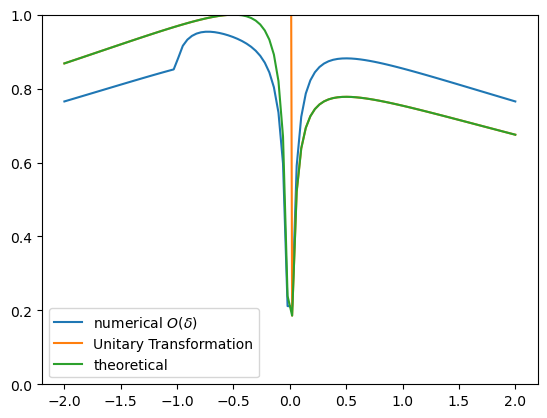

In [1]:
import math
import cmath
import scipy
from scipy.integrate import solve_ivp, quad
import numpy as np
import matplotlib.pyplot as plt

w_val = np.linspace(-2, 2, 100)
TP_list = []
TP2_list = []
TLZ_list = []
for w in w_val:
    ###パラメータ###############################################################################################################
    #変動パラメータ
    E = 1 #掃引速度 epsilon_0
    D_x = 0.1 #最小エネルギー差 Delta_x
    D_y = 0.2*E**2 #y方向のギャップ Delta_y　(1/4)kE^2 = D_y
    t_i = -math.pi #始時間
    t_f = math.pi #終時間

    tp_1 = -math.pi/2 #1回目の遷移点
    tp_2 = 0 #2回目の遷移点

    #固定パラメータ
    h = 1 #Dirac定数
#     w = 1 #掃引速度
    LZ = -(math.pi*D_x**2) / (abs(E)*abs(w)) #Landau-Zener遷移の指数の肩(理論値)
    TLZ = -math.pi*(((D_x + (D_y*w)/E))**2)/(abs(E)*abs(w)) #TLZ遷移の指数の肩(理論値)
    TLZ_list.append(math.exp(TLZ))

    ###########################################################################################################################

    ###関数一覧#################################################################################################################
    #Hamiltonian_complex
    def Hc(t, string):   
        x = D_x# * cmath.sin(w*t)
        y = 2*D_y*(w*t)**2# * cmath.cos(w*t) * cmath.sin(2*w*t)
        z = E*(w*t)# * cmath.cos(w*t)
        x_dot = 0#D_x*w*cmath.cos(w*t)
        y_dot = 4*D_y*w**2*t#D_y*w*(-cmath.sin(w*t)*cmath.sin(2*w*t) + 2*cmath.cos(w*t)*cmath.cos(2*w*t))
        z_dot = E*w #-E*w*cmath.sin(w*t)

        if(string == "x"):
            return x
        elif(string == "y"):
            return y
        elif(string == "z"):
            return z
        elif(string == "x_dot"):
            return x_dot
        elif(string == "y_dot"):
            return y_dot
        elif(string == "z_dot"):
            return z_dot
        
    
    #断熱エネルギー
    def E_plus(t):
        E_plus = cmath.sqrt(Hc(t, "x")**2 + Hc(t, "y")**2 + Hc(t, "z")**2)
        return E_plus

    #補正項を求める
    def Correction_delta1(t):
        phi_dot_num = Hc(tp_2+1j*t,"x")*Hc(tp_2+1j*t,"y_dot") - Hc(tp_2+1j*t,"y")*Hc(tp_2+1j*t,"x_dot")
        phi_dot_den = Hc(tp_2+1j*t,"x")**2 + Hc(tp_2+1j*t,"y")**2
        phi_dot = phi_dot_num / phi_dot_den
        cos_theta = Hc(tp_2+1j*t, "z") / E_plus(tp_2+1j*t)
        
        Integrand = w*phi_dot*cos_theta
        return Integrand.real   
    #積分区間
    ll_CR = 0 #下端
    ul_CR = (D_x + D_y*w/E)/(E*w) #上端
    CR_delta1, err = quad(Correction_delta1, ll_CR, ul_CR) #CR:補正項(弧度法) err2:
    
#     def Correction_delta2(t):
#         phi_dot_num = Hc(tp_2+1j*t,"x")*Hc(tp_2+1j*t,"y_dot") - Hc(tp_2+1j*t,"y")*Hc(tp_2+1j*t,"x_dot")
#         phi_dot_den = Hc(tp_2+1j*t,"x")**2 + Hc(tp_2+1j*t,"y")**2
#         phi_dot = phi_dot_num / phi_dot_den
#         cos_theta = Hc(tp_2+1j*t, "z") / E_plus(tp_2+1j*t)
        
#         Integrand = w**2*(phi_dot**2/E_plus(tp_2+1j*t))*(1/2 - (1/4)*cos_theta**2 )
#         return Integrand.real
    
#     CR_delta2, err2 = quad(Correction_delta2, ll_CR, ul_CR) #CR:補正項(弧度法) err2:
    
    def Correction2(t):
        
        Integrand = -(4)*math.sqrt((D_x + D_y*w/E)**2 - (E*w*t)**2)
        return Integrand
    
    CR2, err2 = quad(Correction2, ll_CR, ul_CR) #CR:補正項(弧度法) err2:
    
    
    TP = math.exp(LZ + 2*CR_delta1)
#     TP2 = math.exp(LZ + 2*CR_delta1 + (2*CR_delta2))
    TP2 = math.exp(CR2)
    TP_list.append(TP)
    TP2_list.append(TP2)

plt.plot(w_val, TP_list, label="numerical $O(\delta)$")
# plt.plot(w_val, TP2_list, label="numerical $O(\delta^2)$")
plt.plot(w_val, TP2_list, label="Unitary Transformation")
plt.plot(w_val, TLZ_list, label="theoretical")
plt.legend()
plt.ylim(0,1)

### グラフ編集用セル

2.944952917743085e-08

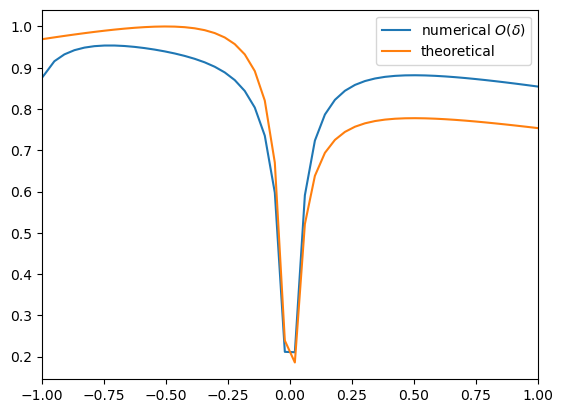

In [28]:
plt.plot(w_val, TP_list, label="numerical $O(\delta)$")
# plt.plot(w_val, TP2_list, label="numerical $O(\delta^2)$")
# plt.plot(w_val, TP2_list, label="Unitary Transformation")
plt.plot(w_val, TLZ_list, label="theoretical")
plt.legend()
# plt.ylim(0,1.1)
plt.xlim(-1, 1)
err